# COGS 108 - Final Project 

# Overview

Nowadays, due to the huge variety of moblie applications, the competition inside the market is extremely high. Every application that wants to be successful has to utilize all available data in order to improve its quality and to avoid possible decisions that could detriment its success. Thus, correct analysis of different phenomena related to applications and discovery of any hidden patterns inside relevant data are essential in helping applications achieve these goals.

Our team came up with the idea that an application's name could be an influential indicator of its success, and we hope to explore upon this idea in our project.

## Names

- Aliaksandr Samushchyk
- Jiayi Zhang
- Soumya Agrawal
- Richard Duong
- Titan Ngo
- Yaman El-Jandali

## Group Members IDs

- A15672156
- A14533542
- A14402679
- A15196673
- A15525832
- A15753076

# Hypothesis

The main hypothesis is the following:
   
    - Does the title of an application influence its success? (1)

We came up to this hypothesis because of several reasons. Sometimes it happens that we think about an application, we know it, but we are unable to remember its title. It makes it difficult to find and install this app or to suggest this app to another person. It could also happen that the title is so long to read that we become less interested in it. These ideas gave a rise to the hypothesis (1).  
We will measure the success of an application using a few metrics such as the number of installations, the rating of an application, and the number of reviews for the app combined with sentiment analysis of the content of these reviews.
We expect that the title has an influence on the applications’ success. In particular, we expect the length of titles to be a significant explanatory variable; from our point of view, the more time you spend to read the names of anything the less interest you keep. 

__TODO: add hypothesis about letters__

# Research Questions

There are several specific data science questions that we formulated. We expect that the answers to these questions will enable us to approve or disprove our hypothesis.

__1) Is the length of an app’s name significant in explaining its success?__

__2) Are there any letters/combinations of letters that tend to be present in more/less successful applications?__

__3) What are the other variables that are significant?__

# Methodology

We will try to answer previously stated questions in our analysis.
First of all, we will introduce our dependent variable (measure of success). In futher text it will be denoted as Y.
Our main goal is to estimate a model (using OLS regression) of the form:

$Y_{i}$ = $β^{T}·$$x_{i}$ + $e_{i}$

Where:
- $β$ is a vector of coefficients, 
- $x_{i}$ - vector of regressors,
- $e_{i}$ - disturbance term;

Remember the OLS assumptions:

1) Linear form

2) Homoscedasticity in errors

3) No multicollinearity

Since there will be a lot of  binary independent variables in out set of regressors(e.g. a column 'z', taking value 1 if an application's name contains 'z' inside it, and zero otherwise), we expect our matrix of regressors suffer from severe multicollinearity. In order to address this issue we will perform __Wilcoxon rank sum test__ on each of these binary variables separetely to determine the most relevant and significant ones. Once we determine such variables, we will keep them in our set of regressors. With the help of this procedure our attempt to satisfy third OLS assumption will have high chances to succeed.

Then, we will run our OLS regression(__simple OLS__). Immideately after that, we will be able to perform __Breusch-Pagan test__ to see whether the errors of regression satisfy the second assumption. If they do not satisfy, we will run new regression. It will be still __OLS regression__, but this time it will be __robust to heteroscedasticity__ in errors.
The reason why simple OLS(without robustness check) first is that if the errors of that regression satisfy the second assumption, the standard errors of estimated coefficients will be lower but still valid and correct. Thus, the p-values will also be lower and more accurate.

# Background and Prior Work

The dataset that we found presents a lot of interesting insights about user
preferences, and we want to explore the effects of certain user preferences on app
rating and popularity.
There is not a lot of background knowledge that we know about user preferences
affecting app popularity other than the obvious correlations between app
rating/popularity, so we would like to use the data to try and find more subtle biases
that might affect it such as title/title length, etc.

References:
- 1)
“A Statistical Analysis of the Apple App Store” by Colin Eberhardt
Did a statistical analysis of prices of apps in the Apple App store. Did not do much
other than basic statistical analysis, such as looking at the genre distribution of apps
and the price differences across genres. Found a positive correlation between price
and app rating.
Source: https://blog.scottlogic.com/2014/03/20/app-store-analysis.html
- 2)
Did a statistical analysis of various factors that contribute to the success of an app in
the Google Play Store. Found that most free apps are monetized by advertisements.
Learned that ~80% of apps on the playstore have been downloaded less than 50k
times. Found that a small amount of users who install actually take the time to write
a review.
Source:
https://nycdatascience.com/blog/student-works/web-scraping/analysis-of-apps-in-the-google-play-store/

The scope of our project is a bit beyond the analysis that these projects present, but
in a similar vein. While these projects analyzed the more basic factors that weigh in
the success of an app, we will be focusing more on subtle user preferences that are
not as obvious to correlate to success.

# Dataset

- Dataset Name: Google Play Store Apps
- Link to the dataset: https://www.kaggle.com/lava18/google-play-store-apps?fbclid=IwAR0I6EIgxdnc3LWhwVVg85gZ9RokprTW6xDo47EQxwDu5Qkce24ZC2MbIBs#googleplaystore_user_reviews.csv
- Number of observations: 64.3k

__TODO - take out sentiment, also talk about combos of letters__

This dataset provides up with a zipped folder containing two files. The first file has around 64.3k observations, with 5 variables. These include the app name, translated review, sentiment, sentiment polarity, and sentiment subject. Most of these variables have been preprocessed already, such as the translated review and sentiment. Many observations in this file (or the reviews), are for the same app. As for the second file, there are around 10.8k observations with 13 variables. The variables include app name, category of the app, the overall user rating, number of reviews, size of the app, number of installs, whether the app is paid or free, the price of the app, the content rating, the genres, when the data was last updated, the current version of the app available on the app store, and the minimum required Android version for the app. With these different features of the app, we will be able to ask our main question, which centers around the popularity of an app, and what makes it popular. Using the sentiment analysis on the reviews and analysis on the title (popular keywords in titles, length of the titles), we can determine factors other than the rating or number of installs to determine an app's popularity.

# Setup

In [124]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns\

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [125]:
# We decided to configure out settings exactly like we did for A2

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Data Wrangling

We have two main files in our data set: googleplaystore.csv and googleplaystore_user_reviews.csv.

For an analysis of app names, we can focus on just the first data set. The second data set gives us reviews of each app, which is not needed for this project.

In [183]:
df = pd.read_csv("google_play_dataset/googleplaystore.csv")

In [184]:
# Preview dataset and get a grasp on its size
df

,App,Category,Rating,Reviews,...,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,...,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,...,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,...,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
...,...,...,...,...,...,...,...,...,...
10838,Parkinson Exercices FR,MEDICAL,NaN,3,...,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,...,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,...,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [185]:
# Show the headers of the different columns
print(list(df.columns.values))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [186]:
# Remove any duplicate applications
# We only want to account for each app once 
df.drop_duplicates(['App'], inplace = True)

In [187]:
# We decided that we only need the app names, ratings, and number of installations. 
df = df[['App', 'Rating', 'Installs', 'Price', 'Size', 'Reviews', 'Category']]

After previewing our dataset, with 10841 observations and 13 variables, we realized that it has a lot of data we do not need.

The __'Size'__ of apps, the __'Type'__ (either free or paid), __'Price'__, __'Content Rating'__ (as in the rating for the suggested age group), the date of when they were __'Last Updated'__, the __'Genres'__ and __'Category'__, and the versions (__'Current Ver'__ and __'Android Ver'__) have little to do with our analysis of specific characterisitcs of the length of title strings, so those columns were dropped.

Our project seeks to see any relationship between characteristics of apps' titles with their success. However, we do not have any direct measure of this ___"Success"___. We decided to keep the __'Rating'__ and __'Installs'__ columns to determine ___"Success"___, but we still want to look at the distributions/correlations of these variables before committing to a specific method of calculation.

In [188]:
# Count amount of missing values in the dataset 
app_nans = df['App'].isna().sum()
rating_nans = df['Rating'].isna().sum()
installs_nans = df['Installs'].isna().sum()
print("app_nans:", app_nans,"\nrating_nans:", rating_nans,"\ninstalls_nans:", installs_nans)

app_nans: 0 
rating_nans: 1463 
installs_nans: 0


There seems to be a considerable amount of observations with missing values. However, the only column in our current dataset that has missing values is __'Ratings'__. Since we absolutely need ratings values for every observation that we have, we will drop all of the observations without them.

In [189]:
# Drops observations missing 'Ratings' data
df = df.dropna()

# Preview the dataframe
df

,App,Rating,Installs,Price,Size,Reviews,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,"10,000+",0,19M,159,ART_AND_DESIGN
1,Coloring book moana,3.9,"500,000+",0,14M,967,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,"5,000,000+",0,8.7M,87510,ART_AND_DESIGN
...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,5.0,100+,0,3.6M,4,FAMILY
10839,The SCP Foundation DB fr nn5n,4.5,"1,000+",0,Varies with device,114,BOOKS_AND_REFERENCE
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,"10,000,000+",0,19M,398307,LIFESTYLE


# Data Pre-Processing & Exploratory Data Analysis

It turns out that the 'Installs' column is a column of strings instead of numbers. We want to convert these strings into numeric values so that we can plot them.

In [190]:
# Delete the '+' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace('+', '')
# Delete the ',' chars that are in these strings in 'Installs'
df['Installs'] = df['Installs'].str.replace(',', '')

# Type cast these strings into integers
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

#TODO : Remove NaN produced here, explain why coerce is a valid method of removing values

#change 'M' to E6 in the Reviews column so that millions can be properly converted numerically
df['Reviews'] = df['Reviews'].str.replace('M', 'E6')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='raise')

#Remove the 'M' which signifies megabytes in the Size column, make everything in units of kilobytes
df['Size'] = df['Size'].str.replace('M', 'E3')
df['Size'] = df['Size'].str.replace('k', '')
df['Size'] = df['Size'].str.replace(',', '')

#We will also remove apps that have varying sizes since we won't be able to model these variations
df['Size'] = df['Size'].replace({'Varies with device': '-1'}, regex=True)
df['Size'] = df['Size'].str.replace('+', '')
df['Size'] = pd.to_numeric(df['Size'], errors='raise')

#Remove sizes that don't make any sense and ones we flagged to be removed earlier
df = df.drop(df[df.Size <= 0].index)

#Remove the money sign from app price
df['Price'] = df['Price'].str.replace('$', '')

#Set apps with the price of "Everyone" to be removed
df['Price'] = df['Price'].str.replace('Everyone', '-1')

#Change price to be a numeric column
df['Price'] = pd.to_numeric(df['Price'], errors='raise')

#Remove prices that don't make sense
df = df.drop(df[df.Price < 0].index)
# Preview the dataframe
# Values in 'Installs' should be numeric
df

,App,Rating,Installs,Price,Size,Reviews,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,0.0,19000.0,159.0,ART_AND_DESIGN
1,Coloring book moana,3.9,5.00e+05,0.0,14000.0,967.0,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,0.0,8700.0,87510.0,ART_AND_DESIGN
...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5.00e+03,0.0,53000.0,38.0,FAMILY
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,0.0,3600.0,4.0,FAMILY
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,0.0,19000.0,398307.0,LIFESTYLE


Since we need some measures of title length, we will create two columns: __'Word Count'__ (counts the number of words in the title) and __'Char Count'__ (counts the number of characters in the title).

In [191]:
# Create the word count column 
df['Word Count'] = df['App'].str.split().str.len()

In [192]:
# Create the char count column 
df['Char Count'] = df['App'].str.len() - df['App'].str.count(' ')

In [193]:
# Preview table again to check for these columns
df

,App,Rating,Installs,Price,...,Reviews,Category,Word Count,Char Count
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,0.0,...,159.0,ART_AND_DESIGN,9,38
1,Coloring book moana,3.9,5.00e+05,0.0,...,967.0,ART_AND_DESIGN,3,17
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,0.0,...,87510.0,ART_AND_DESIGN,10,41
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5.00e+03,0.0,...,38.0,FAMILY,4,13
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,0.0,...,4.0,FAMILY,5,28
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,0.0,...,398307.0,LIFESTYLE,7,39


We also want to add columns regarding the frequency of certain letters and letter pairs.

The code below creates many columns with binary variables depending on the presence of letters and letter pairs. For example, values in column 'a' are equal to 1 if 'a' is contained in apps name and 0 otherwise, and values in column 'wq' are equal to 1 if 'wq' is contained in apps name and 0 otherwise.

Then, we count how many ones are in each of the created columns to assess if the column is useful. If there are not a lot of ones in a column (less than 0.025 * (# of rows) for example) or too many (more than 0.975 * (# of rows) for example), we remove such columns. This is done because, for example, there are not a lot of titles with 'wq' inside them so 'wq' column is not useful for our analysis

In [194]:
import string
alphabet = list(string.ascii_lowercase)

for k in alphabet:
    q1 = []
    for i in df['App']:
        if k in i:
            q1.append(1)
        else:
            q1.append(0)
    df[k] = q1

alphabet1 = []
for i in alphabet:
    for k in alphabet:
        alphabet1.append(i + k)
        
for k in alphabet1:
    q2 = []
    for i in df['App']:
        if k in i:
            q2.append(1)
        else:
            q2.append(0)
    df[k] = q2


rem_list = []                           ##here 13 and 715 are indexes of first and last created columns  
for i in range(13,707):                 ##it is possible when you will try to execute code you will need to insert proper values 
    if sum(df[df.columns[i]]) < 0.025*df.shape[0] or sum(df[df.columns[i]]) > 0.975*df.shape[0]:
        rem_list.append(i)


s = 0
for i in rem_list:
    i = i - s
    del df[df.columns[i]]
    s += 1

In [195]:
# Preview new dataset
df

,App,Rating,Installs,Price,...,zw,zx,zy,zz
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,1.00e+04,0.0,...,0,0,0,0
1,Coloring book moana,3.9,5.00e+05,0.0,...,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5.00e+06,0.0,...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,5.00e+03,0.0,...,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,5.0,1.00e+02,0.0,...,0,0,0,0
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,1.00e+07,0.0,...,0,0,0,0


In [196]:
# Preview the columns of some example letters
df[['a','b','c']]

,a,b,c
0,1,0,1
1,1,1,0
2,1,0,1
...,...,...,...
10836,1,0,1
10837,1,0,1
10840,1,0,1


In [197]:
# Viewing general statistics of our data
df.describe()

,Rating,Installs,Price,Size,...,zw,zx,zy,zz
count,7027.00,7.03e+03,7027.00,7027.00,...,7027.0,7027.0,7.03e+03,7.03e+03
mean,4.16,4.47e+06,1.17,21754.43,...,0.0,0.0,2.28e-03,7.54e-03
std,0.56,2.71e+07,18.20,22726.50,...,0.0,0.0,4.77e-02,8.65e-02
...,...,...,...,...,...,...,...,...,...
50%,4.30,1.00e+05,0.00,13000.00,...,0.0,0.0,0.00e+00,0.00e+00
75%,4.50,1.00e+06,0.00,31000.00,...,0.0,0.0,0.00e+00,0.00e+00
max,5.00,1.00e+09,400.00,100000.00,...,0.0,0.0,1.00e+00,1.00e+00


## Let's Start Plotting!

### Plotting the indivdual variables

#### Rating

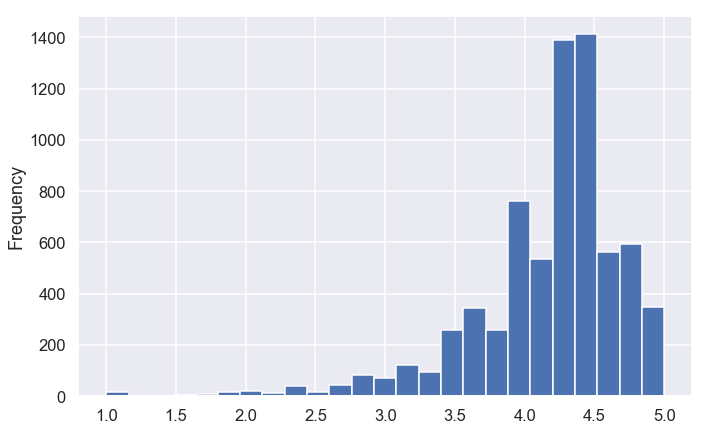

In [198]:
# Plots 'Rating' (which is a value from 0 to 5) to see its distribution
df['Rating'].plot.hist(bins = 25, figsize=(11,7))

Ratings in the Google Play Store can only be values in the range between 0 and 5! There are some ratings that are past the maximum 5 stars, so we will remove those.

In [199]:
# Drops invalid ratings (greater than 5) 
df = df[df.Rating <= 5]

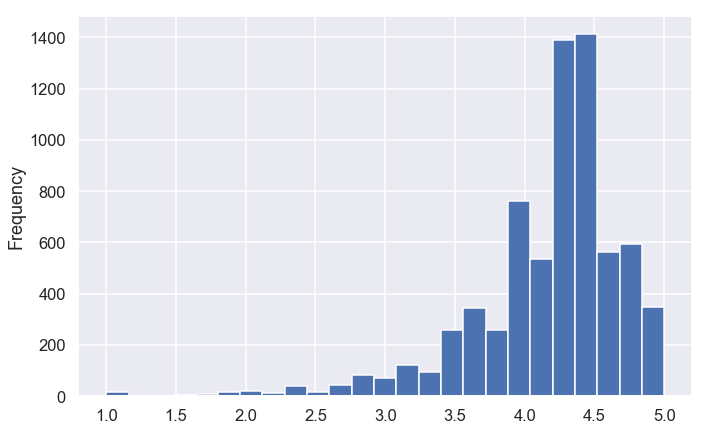

In [200]:
# Plots 'Rating' of apps (which are values from 0 to 5) to see its distribution
df['Rating'].plot.hist(bins = 25, figsize=(11,7))

After removing the invalid values, we are able to get a better idea of the distribution of the ratings ranging from 0 to 5. The graph aboves shows us that there is a greater number of apps that are rated from 2.5-5 than 0-2.5. In other words, there is a negative skew.

In [201]:
# Calculate the mean of 'Rating'
mean = df['Rating'].mean()
median = df['Rating'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 4.160623310089655 
 The median is: 4.3


From the above histogram, we can say that most apps have high ratings, (with a mean rating of ~4.17) probably due to peoples' rating tendencies. Distribution-wise, __ratings are skewed left__.

#### Word Count

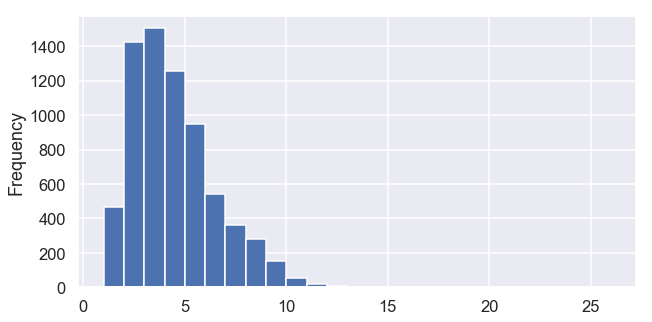

In [202]:
# Plots 'Word Count' of app titles to see its distribution
df['Word Count'].plot.hist(bins = 25, figsize=(10,5))

The plot above has a lot of empty space probably due to the presence of outliers. Let's confirm this.

In [203]:
# Print the max and min of 'Word Count'
minValue = df['Word Count'].min()
maxValue = df['Word Count'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1 
 The max is: 26


There is a title with 26 words!

Since it is generally accepted to do so, we will be removing all outliers 2 standard deviations away form the mean. By convention, values within two standard deviations of the mean (plus or minus) contain 95% of all the points.

In [204]:
# We first store the values of the std and the mean.

wordCountSD = df['Word Count'].std()
wordCountMean = df['Word Count'].mean()

# We then remove outliers
df = df.drop(df[(df['Word Count'] < (wordCountMean - 2*wordCountSD)) | (df['Word Count'] > (wordCountMean + 2*wordCountSD))].index)


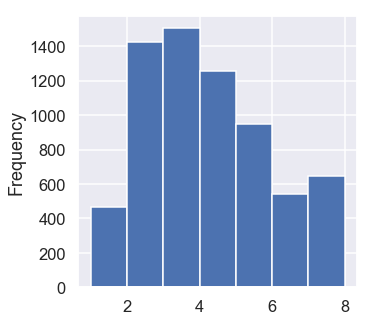

In [205]:
# Plots 'Word Count' of app titles to see its distribution
df['Word Count'].plot.hist(bins = 7, figsize=(5,5))

In [206]:
# Calculate the mean and median of 'Word Count'
mean = df['Word Count'].mean()
median = df['Word Count'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 3.7776302198612957 
 The median is: 3.0


In [207]:
# Print the max and min of 'Word Count'
minValue = df['Word Count'].min()
maxValue = df['Word Count'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1 
 The max is: 8


From the above histogram, we can say that most apps have relatively low word count (with a mean of ~3.79). Word count is ___slightly_ skewed to the right__.

#### Char Count

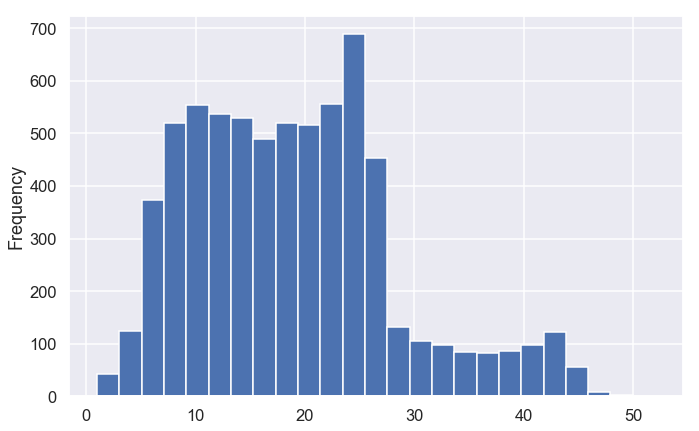

In [208]:
# Plots 'Char Count' app titles to see its distribution
df['Char Count'].plot.hist(bins = 25, figsize=(11,7))

In [209]:
# Print the max and min of 'Char Count'
minValue = df['Char Count'].min()
maxValue = df['Char Count'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1 
 The max is: 52


In [210]:
# Calculate the mean and median of 'Char Count'
mean = df['Char Count'].mean()
median = df['Char Count'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 19.040283311199644 
 The median is: 18.0


Char count has a mean of ~19.22.

By the graph above, we can say that __char count is right skewed__.

#### Installs

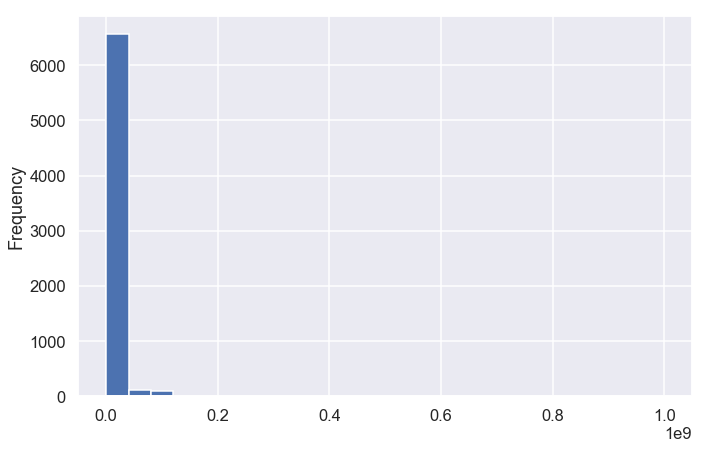

In [211]:
# Plots 'Installs' to see its distribution
df['Installs'].plot.hist(bins = 25, figsize=(11,7))

As we can see above, the graph has many spaces in between the different intervals on the x-axis. This may be due to the fact that our data does not provide a comprehensive number of installs, but instead categegorizes them as above a certain threshold, like 10,000+ or 50,000+, and so on. Therefore, we can see there are many apps in the beginning ranges of 0.0-0.1 1e8. As the range increases to 0.5 1e8 or even 1 1e8, the number of apps in that category begins to decrease.

In [212]:
# Print the max and min of 'Installs'
minValue = df['Installs'].min()
maxValue = df['Installs'].max()
print(" The min is:", minValue, '\n', "The max is:", maxValue)

 The min is: 1.0 
 The max is: 1000000000.0


In [213]:
# Find out how mnay apps share the max value of 'Installs'
dfMax = df.loc[ df['Installs'] == df['Installs'].max() ]
dfMax.shape[0]

2

(There are 20 applications that share the same number of installs, the maximum value of installs of our dataset)

Unlike what we did with Word Count and Char Count, we decided __not__ to remove outliers for installs. This is largely due to the fact that, as explained above, our dataset gives us the number of installs for apps in "plateus". By removing outliers, we will be getting rid of the applications that are extremely successful and share the same number of installs in our dataset (such as Facebook, Snapchat, and Instagram). It is important to note that making this decision either way (deciding that we are getting rid of these outliers or keeping them) is inherently biased.

In [214]:
# Calculate the mean and median of 'Installs'
mean = df['Installs'].mean()
median = df['Installs'].median()
print(" The mean is:", mean, '\n', "The median is:", median)

 The mean is: 4468160.721263096 
 The median is: 100000.0


Installs has a mean of ~9272736.74.

From the above histogram, it looks like installs is strongly __skewed right__.

### Let's try to explore some relationships between our variables.

In [215]:
# Calculates Pearson correlation coefficient between variables with all observations
df.iloc[:,1:5].corr()

,Rating,Installs,Price,Size
Rating,1.00,0.05,-0.02,0.06
Installs,0.05,1.00,-0.01,0.13
Price,-0.02,-0.01,1.00,-0.03
Size,0.06,0.13,-0.03,1.00


Save for the obvious relationship between word count and char count, there is little correlation between the variables based on Pearson's value.

#### Is there any relationship between _ratings_ and _installs_?

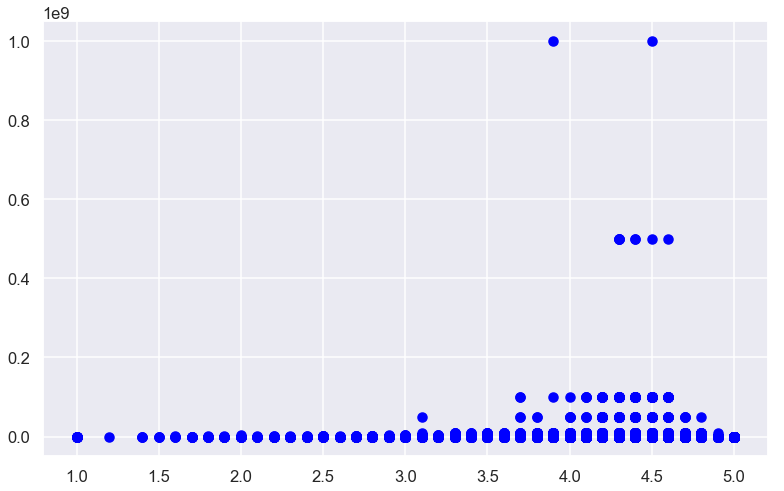

In [216]:
x = df['Rating']
y = df['Installs']
fig = plt.figure(figsize=(13, 8))
plt.scatter(x, y, c='blue')

E:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


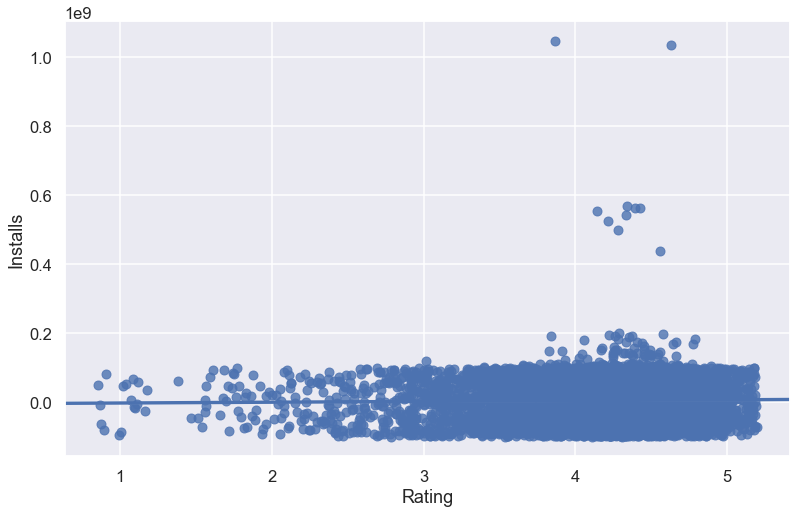

In [217]:
# Use jittering in order to better visualize the above scatter plot 
fig = plt.figure(figsize=(13, 8))
sns.regplot(x='Rating', y='Installs', data=df, x_jitter=0.2, y_jitter=100000000)

With installs on the y axis and ratings on the x axis, we can see that the graphs above present a trend. Although not a perfect negative skew, we can see that apps with ratings from 3-5 have a slightly higher number of installs than apps with ratings from 0-2.5. Similar to the installs graph, the flat lines are due to the way the number of installs was categorized into ranges/buckets of values above a certain threshold, like 10,000+ or 50,000+. Therefore, we can observe the lines at 0.5 1e8 and 1 1e8, which mean that some apps with ratings 3-5 had that number of installs.

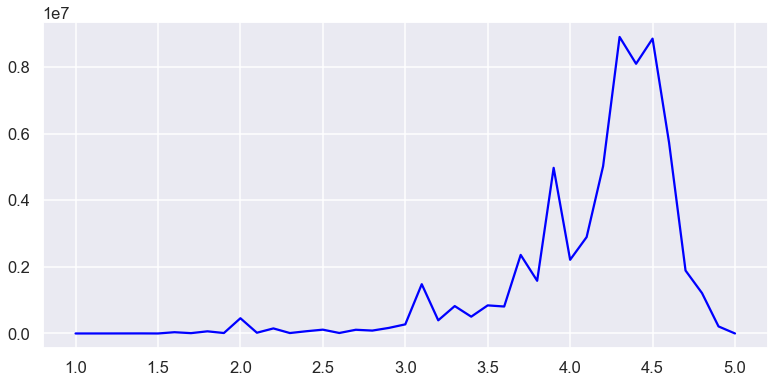

In [218]:
# Plots ratings on the x-axis and average number of installs on the y-axis
df_RvsI = df.groupby('Rating').mean()
x = df_RvsI.index
y = df_RvsI['Installs']
fig = plt.figure(figsize=(13, 6))
plt.plot(x, y, c='blue')

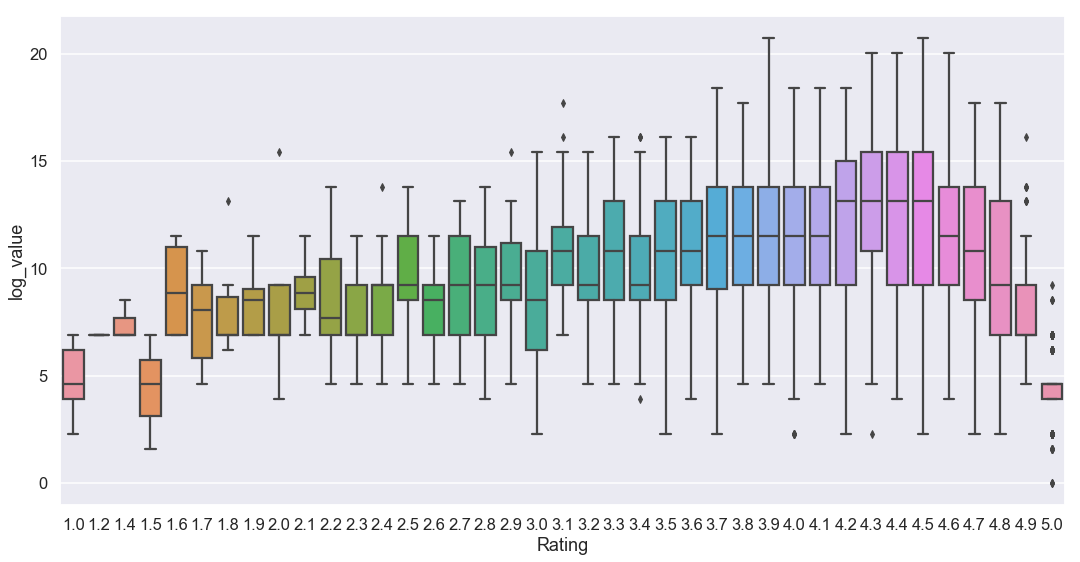

In [219]:
# Box-plots ratings on the x-axis and log value of Installs on the y-axis
fig = plt.figure(figsize=(18, 9))
df['log_value'] = np.log(df['Installs'])
sns.boxplot(x='Rating', y='log_value', data=df)
ax = plt.gca()

From the above four graphs, we can say that there is strong enough relationship between ratings and installs. As ratings increase, there is a general trend that installs also increases.

Due to this relationship, and the fact that rating as a variable does not vary much (most ratings are between 4 to 5 as demonstrated earlier: with a mean of ~4.17 and a median of 4.3), we decided to utilize only installs as a measure of success for our project.

#### We want to see if there is any trend/correlation between _word count_ and _installs_.

In [220]:
# Groups apps by the number of words they have, then gets the average number of installs and displays them
df_new = df.groupby('Word Count').mean()
df_new

,Rating,Installs,Price,Size,...,zx,zy,zz,log_value
Word Count,,,,,,,,,
1,4.10,6.16e+06,0.18,19551.93,...,0.0,0.00e+00,0.00e+00,11.39
2,4.07,5.60e+06,0.24,21060.65,...,0.0,2.11e-03,8.42e-03,10.72
3,4.12,4.06e+06,2.04,21828.56,...,0.0,2.00e-03,2.66e-03,11.11
...,...,...,...,...,...,...,...,...,...
6,4.25,3.91e+06,0.87,24353.76,...,0.0,3.71e-03,1.48e-02,11.98
7,4.28,4.66e+06,0.24,23646.12,...,0.0,5.52e-03,1.66e-02,11.84
8,4.27,6.98e+06,0.27,23239.11,...,0.0,3.55e-03,7.09e-03,12.07


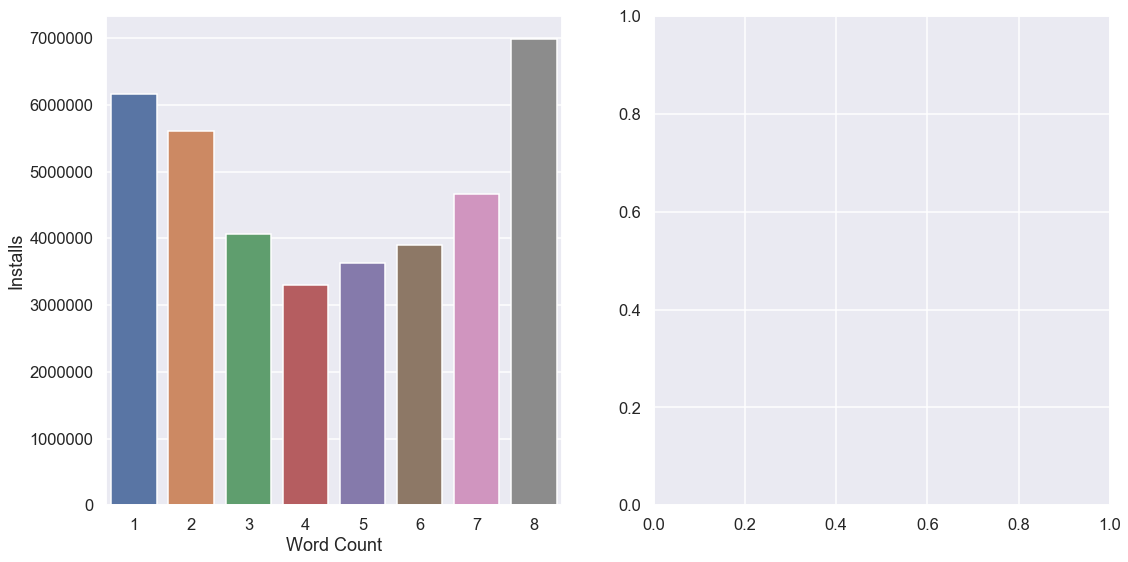

In [221]:
fig = plt.figure(figsize=(18, 9))
fig.add_subplot(1, 2, 1)
# Plots the average number of installs (y-axis) for apps of each word count (x-axis)
x1 = df_new.index
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new);

fig.add_subplot(1, 2, 2)



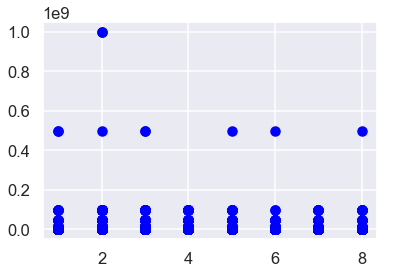

In [222]:
x = df['Word Count']
y = df['Installs']
plt.scatter(x, y, c='blue')

E:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


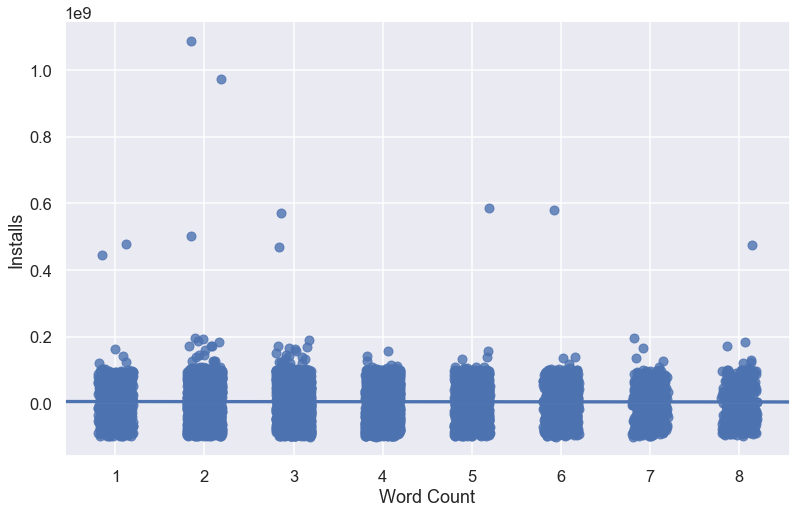

In [223]:
fig = plt.figure(figsize=(13, 8))
sns.regplot(x='Word Count', y='Installs', data=df, x_jitter=0.2, y_jitter=100000000)

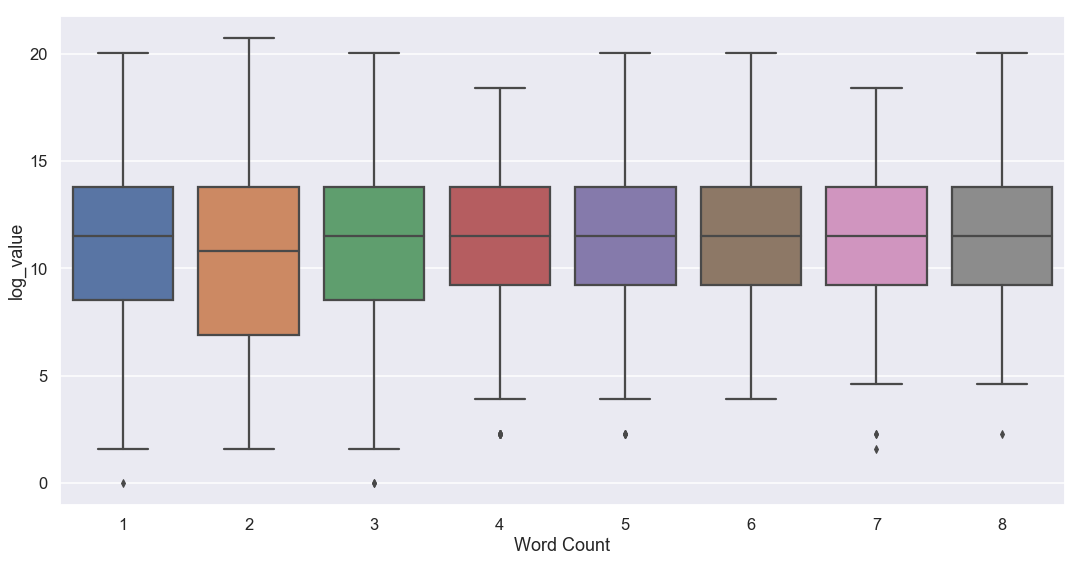

In [224]:
fig = plt.figure(figsize=(18, 9))
sns.boxplot(x='Word Count', y='log_value', data=df)
ax = plt.gca()

#### Similarly, what about _char count_ and _installs_?

In [225]:
# Groups apps by the number of words they have, then gets the average number of installs and displays them
df_new = df.groupby('Char Count').mean()
df_new

,Rating,Installs,Price,Size,...,zx,zy,zz,log_value
Char Count,,,,,,,,,
1,3.95,5.25e+05,0.00,46000.00,...,0.0,0.0,0.0,12.32
2,3.94,2.20e+06,0.04,9768.12,...,0.0,0.0,0.0,9.75
3,3.97,3.53e+07,0.00,21750.00,...,0.0,0.0,0.0,14.22
...,...,...,...,...,...,...,...,...,...
48,4.50,1.00e+05,0.00,13000.00,...,0.0,0.0,0.0,11.51
49,3.70,2.75e+06,0.00,10550.00,...,0.0,0.0,0.0,14.27
52,4.30,1.00e+06,0.00,8600.00,...,0.0,0.0,0.0,13.82


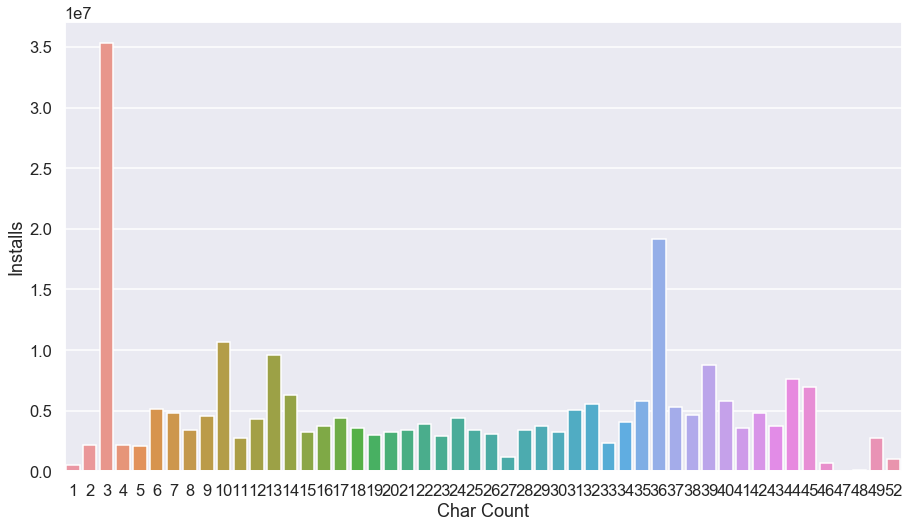

In [226]:
# Plots the average number of installs (y-axis) for apps of each word count (x-axis)
x1 = df_new.index
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
sns.barplot(x=x1, 
            y='Installs', 
            data=df_new,
            ax = ax);

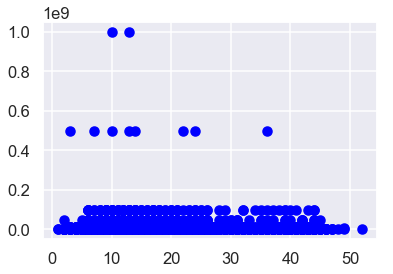

In [227]:
x = df['Char Count']
y = df['Installs']
plt.scatter(x, y, c='blue')

E:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


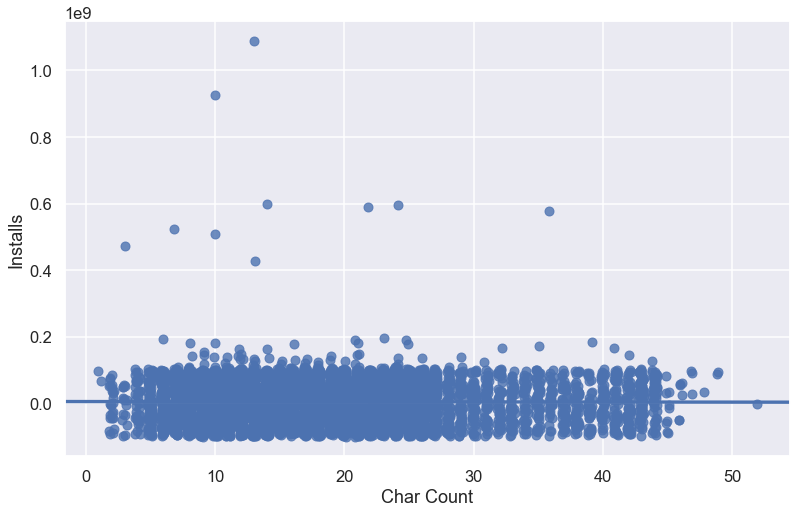

In [228]:
# Use jitering to better visualize the above scatter plot
fig = plt.figure(figsize=(13, 8))
sns.regplot(x='Char Count', y='Installs', data=df, x_jitter=0.2, y_jitter=100000000)

With installs on the y axis and char count on the x axis, we can see that the graph above presents a clear trend. Although not a perfect positive skew, we can see that apps with a char count from 0-50 have a higher number of installs than apps with char counts greater than 50. Similar to the installs graph, the flat lines are due to the way the number of installs was categorized into ranges/buckets of values above a certain threshold, like 10,000+ or 50,000+. Therefore, we can observe the lines at 0.5 1e8 and 1 1e8, which mean that some apps with a char count of 0-50 had that number of installs.

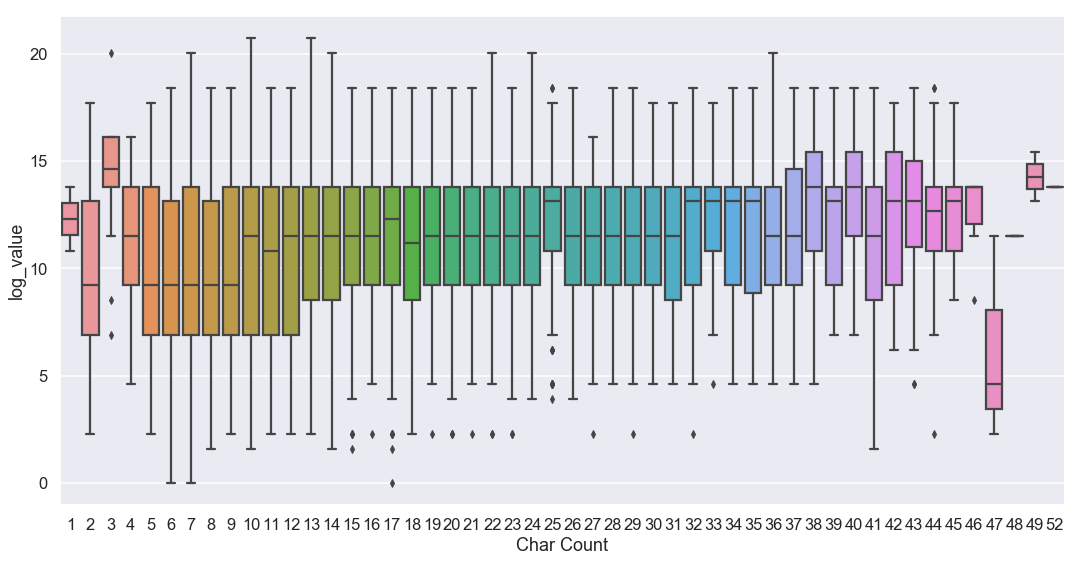

In [229]:
fig = plt.figure(figsize=(18, 9))
sns.boxplot(x='Char Count', y='log_value', data=df)
ax = plt.gca()

Now that we found a trend between word count and installs, is there any relationship between rating and word count?

# Data Analysis & Results

Firstly, we will find by Wilcoxon rank sum test which of the letters/combinations of letters are not significant. Remember, we are doing so in order to decrease a chance of a potential multicollinearity problem in our main regression, because all these variables we will apply Wilcoxon test to are binary variables.

In [230]:
import scipy

#First we need a list of insignificant variables that will be useless in our regression

#vector that will contain insignificant columns concerning letters/combinations of letters
insignificant_letters = []

#following peace of code loops through every column from 'a' to 'zz'
#and tests whether 'Reviews' where this letter is present comes 
#from the same distribution as distribution of 'Reviews' where this letter is absent 
for col_name in df.columns[9:159]:     
    
    presence_vector = df[df[col_name]==1]['Reviews']#reviews for which value of col_name is 1
    absence_vector = df[df[col_name]==0]['Reviews']#reviews for which value of col_name is 0
    
    test_stat, pval = scipy.stats.ranksums(presence_vector,absence_vector)
    
    #appending insignificant_letters list if the current column is insignificant at 0.01 level
    if pval > 0.01:
        insignificant_letters.append(col_name)

print(insignificant_letters)

['c', 'f', 'x', 'z', 'ac', 'ai', 'al', 'ap', 'at', 'ay', 'bi', 'ca', 'ce', 'ch', 'ci', 'co', 'ct', 'de', 'di', 'ec', 'ed', 'el', 'em', 'en', 'es', 'et', 'ew', 'fi', 'fo', 'ha', 'he', 'hi', 'ia', 'ic', 'id', 'ie', 'il', 'io', 'is', 'it', 'la', 'le', 'li', 'lo', 'ma', 'mi', 'na', 'nc', 'ni', 'ns', 'nt', 'ob', 'od', 'ol', 'on', 'or', 'ou', 'pa', 'pe', 'pp', 'ri', 'ro', 'rs', 'rt', 'ry', 'se', 'si', 'ss', 'st', 'ta', 'te', 'th', 'ti', 'tr', 'tt', 'tu', 'ty', 'ul', 'um', 'ur', 'us', 'ut', 'vi', 'zy', 'zz']


E:\Python\lib\site-packages\scipy\stats\stats.py:4971: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


So, based on the findings in the previous cell we can deduce that columns, that are present in insignificant_letters list are insignificant in explaining success measured as total number of reviews of an app. This fact allows us not to include those variables into regression in order to avoid potential severe multicollinearity.

Thus, we can drop these columns from our dataset.

In [231]:
df.drop(insignificant_letters, axis = 1, inplace = True)

Remember, that we will need to write huge amount of text inside __sm.OLS(_here_)__ . To avoid typing this long text with all variables we need, we will create one list that will caontain all information we need.

In [232]:
df.columns

Index(['App', 'Rating', 'Installs', 'Price', 'Size', 'Reviews', 'Category',
       'Word Count', 'Char Count', 'a', 'b', 'd', 'e', 'g', 'h', 'i', 'k', 'l',
       'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'ad', 'ag', 'am',
       'an', 'ar', 'as', 'bo', 'ck', 'ds', 'ea', 'ee', 'eo', 'er', 'ge', 'ho',
       'ig', 'im', 'in', 'ir', 'iv', 'ke', 'll', 'me', 'nd', 'ne', 'ng', 'oa',
       'oc', 'ok', 'om', 'oo', 'op', 'os', 'ot', 'ow', 'ra', 'rd', 're', 'sh',
       'to', 'ts', 'un', 've', 'zw', 'zx', 'log_value'],
      dtype='object')

In [241]:
# reg_list will is final list of all regressors we need
reg_list = list(df.columns[7:-1])
reg_list.append('Price')
reg_list.append('Size')

Now, we are ready to perform OLS regression.

In [242]:
df.columns

Index(['App', 'Rating', 'Installs', 'Price', 'Size', 'Reviews', 'Category',
       'Word Count', 'Char Count', 'a', 'b', 'd', 'e', 'g', 'h', 'i', 'k', 'l',
       'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y', 'ad', 'ag', 'am',
       'an', 'ar', 'as', 'bo', 'ck', 'ds', 'ea', 'ee', 'eo', 'er', 'ge', 'ho',
       'ig', 'im', 'in', 'ir', 'iv', 'ke', 'll', 'me', 'nd', 'ne', 'ng', 'oa',
       'oc', 'ok', 'om', 'oo', 'op', 'os', 'ot', 'ow', 'ra', 'rd', 're', 'sh',
       'to', 'ts', 'un', 've', 'zw', 'zx', 'log_value'],
      dtype='object')

In [243]:
import statsmodels.api as sm


model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     5.839
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.18e-45
Time:                        18:22:12   Log-Likelihood:            -1.0323e+05
No. Observations:                6777   AIC:                         2.066e+05
Df Residuals:                    6709   BIC:                         2.071e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.523e+04    3.8e+04      0.664      0.5

E:\Python\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
E:\Python\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


As we can see from Warnings in OLS summary, there is still a problem with multicollinearity. We will now build F-test for testing mutual insignificance of all letter regressors whose p-values are greater than 0.15 to see whether we can delete them from the set of the regressors.

In [244]:
hypothesis = '(b = 0),(d = 0), (g = 0), (h = 0), (p = 0), (r = 0), (v = 0), (w = 0), (y = 0), (bo = 0), (eo = 0), (ge = 0), (in = 0), (nd = 0), (oc = 0), (un = 0), (k = 0), (l = 0), (m = 0), (n = 0),(o = 0),(s = 0),(u = 0),(ad = 0),(an = 0),(ck = 0),(ds = 0),(ea = 0),(ee = 0),(ho = 0),(ig = 0),(im = 0),(ke = 0),(me = 0),(ne = 0),(ng = 0),(oa = 0),(ok = 0),(om = 0),(oo = 0),(op = 0),(os = 0),(ot = 0),(ow = 0),(ra = 0),(rd = 0),(re = 0),(to = 0),(ts = 0),(zw = 0)'
f_test = results.f_test(hypothesis)
print(f_test)

<F test: F=array([[0.62098706]]), p=0.9825682509276624, df_denom=6709, df_num=49>


E:\Python\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 50, but rank is 49
  'rank is %d' % (J, J_), ValueWarning)


The p-value of F-test is nearly one, thus, we cannot reject the null hypothesis that the variables contained in _hypothesis_ in the cell above are mutually insignificant in our regression. So we can delete them from our regression without loss of main results.


In [245]:
reg_list.remove('b')
reg_list.remove('d')
reg_list.remove('g')
reg_list.remove('h')
reg_list.remove('p')
reg_list.remove('r')
reg_list.remove('v')
reg_list.remove('w')
reg_list.remove('y')
reg_list.remove('bo')
reg_list.remove('eo')
reg_list.remove('ge')
reg_list.remove('in')
reg_list.remove('nd')
reg_list.remove('oc')
reg_list.remove('un')
reg_list.remove('k')
reg_list.remove('l')
reg_list.remove('m')
reg_list.remove('n')
reg_list.remove('o')
reg_list.remove('s')
reg_list.remove('u')
reg_list.remove('ad')
reg_list.remove('an')
reg_list.remove('ck')
reg_list.remove('ds')
reg_list.remove('ea')
reg_list.remove('ee')
reg_list.remove('ho')
reg_list.remove('ig')
reg_list.remove('im')
reg_list.remove('ke')
reg_list.remove('me')
reg_list.remove('ne')
reg_list.remove('ng')
reg_list.remove('oa')
reg_list.remove('ok')
reg_list.remove('om')
reg_list.remove('oo')
reg_list.remove('op')
reg_list.remove('os')
reg_list.remove('ot')
reg_list.remove('ow')
reg_list.remove('ra')
reg_list.remove('rd')
reg_list.remove('re')
reg_list.remove('to')
reg_list.remove('ts')
reg_list.remove('zw')


Now we are ready to run new regression with corrected list of independent variables to hope to avoid multicollinearity problem.

In [246]:
model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     20.10
Date:                Mon, 27 May 2019   Prob (F-statistic):           5.83e-64
Time:                        18:24:54   Log-Likelihood:            -1.0324e+05
No. Observations:                6777   AIC:                         2.065e+05
Df Residuals:                    6758   BIC:                         2.067e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.001e+04   3.58e+04      0.837      0.4

As we can see again from Warnings in OLS summary, there is still a problem with multicollinearity. We will now again build F-test for testing mutual insignificance of all remaining letter regressors whose p-values are greater than 0.05 to see whether we can delete them from the set of the regressors.

In [249]:
hypothesis = '(a = 0),(am = 0), (ir = 0), (ll = 0), (zx = 0)'
f_test = results.f_test(hypothesis)
print(f_test)

<F test: F=array([[2.84324049]]), p=0.022753334212775374, df_denom=6758, df_num=4>


E:\Python\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  'rank is %d' % (J, J_), ValueWarning)


As we can see from the results of the F-test, low p-value (lower than 0.025) allows us to reject the null hypothesis that 'a','am,'ir','ll','zx' are mutually insignificant. Now we find such a subset from these variables that they will be mutually independent.

In [252]:
hypothesis = '(ll = 0),(ir = 0), (zx = 0)'
f_test = results.f_test(hypothesis)
print(f_test)

<F test: F=array([[2.59691545]]), p=0.07457737972784234, df_denom=6758, df_num=2>


E:\Python\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


By the results of another F-test, we are allowed to drop 'll', 'ir','zx' from list of regressors.

In [253]:
reg_list.remove('ll')
reg_list.remove('ir')
reg_list.remove('zx')

In [254]:
model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     22.28
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.11e-64
Time:                        18:42:01   Log-Likelihood:            -1.0324e+05
No. Observations:                6777   AIC:                         2.065e+05
Df Residuals:                    6760   BIC:                         2.066e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.863e+04   3.58e+04      0.799      0.4

As it can be seen fron Warnings of the regression, there is still a multicollinearity problem. We have made good efforts to avoid it, but it is still present. We will continue our analysis having in mind this problem.

Now let's test another OLS assumption, i.e. homoscedasticity of errors. To do so, we will buils a Breusch-Pagan test. The null hypothesis is that the variance of errors of regression is homoscedastic.

In [257]:
import statsmodels
br_pagan_results = statsmodels.stats.diagnostic.het_breuschpagan(results.resid,sm_non_formula.add_constant(df[reg_list]))
print(br_pagan_results)

(119.71856011324856, 6.221598855052344e-18, 7.597859892897666, 4.1921780770804325e-18)


The number we need to take into account is the second number from the list above. This is the p-value of Breusch-Pagan test that indicates that the null hypothesis of homoscedasticity in errors can be rejected(p_value is almost zero). Thus, we need to build another regression with standard errors robust to heteroscedasticity.

In [258]:
model = sm.OLS(endog = df['Reviews'], exog = sm.add_constant(df[reg_list]))
results = model.fit(cov_type = 'HC3', use_t = None)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Reviews   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     5.424
Date:                Mon, 27 May 2019   Prob (F-statistic):           1.18e-11
Time:                        18:57:53   Log-Likelihood:            -1.0324e+05
No. Observations:                6777   AIC:                         2.065e+05
Df Residuals:                    6760   BIC:                         2.066e+05
Df Model:                          16                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.863e+04    2.7e+04      1.059      0.2

Regression above is the final version of regressio; unfortunately we were unable to avoid multicollinearity problem, but still our results are valid.
Here we discuss partially our main findings:
(we assume significance level to be 0.05)

1) variables that are not connected with title(i.e. Size and Price): Size appears to be significant explanator of apps success measured as total number of reviews for the app, whereas Price is not significant.

2) length of title(either Char count or Word count) appears to be completely insignificant in explaining apps success(both Word count and Char count have extremely large p-values)

3) concerning specific letters/combinations of letter:     
   The following variables are insignificant: 'as', 'ag';
   The following variables tend to be present in less successful apps(their coefficients are negative): 've', 'ar', 'am', 't',
   'i', 'e';
   The following variables tend to be present in more successful apps(their coefficients are positive): 'sh', 'iv', 'er', 'a';

# Ethics & Privacy

# Conclusion & Discussion

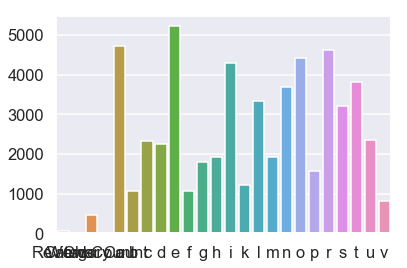

In [50]:
# Make a bar plot where each bar shows the number of app titles each letter appears in

num= []
letter = []
for index in range(5,29):
    pos = (df.iloc[: , index] == 1).sum()
    columnSeriesObj = df.iloc[: , index]
    num.append(pos)
    letter.append(df.iloc[: , index].name)
sns.barplot(letter,num)